### 오케라스트라 (캐글뽀개기X케라스코리아) 파트1 주말반

#### 4회차, 이상열

#### (keras) 3. 레이어 개념잡기

### 페이스북 커뮤니티 (스터디)
- 캐글뽀개기 : https://www.facebook.com/groups/kagglebreak/
- 케라스 코리아 : https://www.facebook.com/groups/KerasKorea/
- 자료 참고 블로그 레퍼런스 : https://tykimos.github.io/lecture/ 

    #### 3-1. 다층 퍼셉트론 레이어 이야기 (1)
    #### 3-2. 다층 퍼셉트론 모델 만들어보기 (1)
    #### 3-3. 컨볼루션 신경망 레이어 이야기 (1)
    #### 3-4. 컨볼루션 신경망 모델 만들어보기 (1)
    #### 3-5. 컨볼루션 신경망 모델을 위한 데이터 부풀리기 (1)
    #### 3-6. 순환 신경망 레이어 이야기 (2)
    #### 3-7. 순환 신경망 모델 만들어보기 (2)
    
- 오늘은 (1)만 진행함, 5회차 때 (2) 진행


### 3-1. 다층 퍼셉트론 레이어 이야기

- 레이어(layer, 층) 개념에 대해서 알아봅니다. 케라스의 핵심 데이터 구조는 모델이고, 이 모델을 구성하는 것이 레이어 
- 다층 퍼셉트론 모델에서 사용되는 Dense 레이어

![img4_1](./img/img4_1.png)
![img4_2](./img/img4_2.png)

- 입출력을 모두 연결해주는 Dense 레이어, Dense 레이어는 입력과 출력을 모두 연결해줌. 예를 들어 입력 뉴런이 4개, 출력 뉴런이 8개있다면 총 연결선은 32개 32개. 각 연결선에는 가중치(weight)를 포함하고 있는데, 이 가중치가 나타내는 의미는 연결강도

- Dense(8, input_dim=4, init='uniform', activation='relu'))
    - 첫번째 인자 : 출력 뉴런의 수를 설정합니다.
    - input_dim : 입력 뉴런의 수를 설정합니다.
    - init : 가중치 초기화 방법 설정합니다. (‘uniform’ : 균일 분포, ‘normal’ : 가우시안 분포)
    - activation : 활성화 함수 설정합니다.
    - ‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
    - ‘relu’ : rectifier 함수, 은익층에 주로 쓰입니다.
    - ‘sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
    - ‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

![img4_3](./img/img4_3.png)

```
model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
```

![img4_4](./img/img4_4.png)

In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform", input_dim=4)`
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, kernel_initializer="uniform", activation="relu")`
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="sigmoid")`


In [15]:
model

In [17]:
model

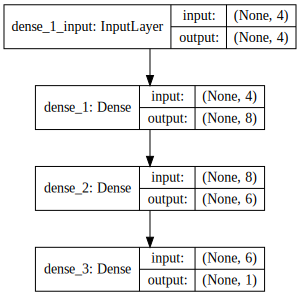

In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 다층 퍼셉트론 모델 만들어보기

- 문제 정의하기
- 데이터 준비하기
- 데이터셋 생성하기
- 모델 구성하기
- 모델 학습과정 설정하기
- 모델 학습시키기
- 모델 평가하기

#### 문제 정의하기
- 다층 퍼셉트론 모델은 가장 기본적인 모델. 본 예제에서는 비교적 쉬운 이진 분류 문제를 적용
- 이진 분류 예제에 적합한 데이터셋은 8개 변수와 당뇨병 발병 유무가 기록된 ‘피마족 인디언 당뇨병 발병 데이터셋’
- 이 데이터셋을 이용하여 8개 변수를 독립변수로 보고 당뇨병 발병 유무를 예측하는 이진 분류 문제로 정의

[당뇨병 데이터](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# 랜덤시드 고정시키기
np.random.seed(5)

#### 데이터 준비하기
- 위 링크에서 ‘pima-indians-diabetes.names’을 열어보면 데이터셋에 대한 설명이 포함되어 있습니다. 먼저 몇가지 주요 항목을 살펴보겠습니다.

- 인스턴스 수 : 768개
- 속성 수 : 8가지
- 클래스 수 : 2가지
    - 임신 횟수
    - 경구 포도당 내성 검사에서 2시간 동안의 혈장 포도당 농도
    - 이완기 혈압 (mm Hg)
    - 삼두근 피부 두겹 두께 (mm)
    - 2시간 혈청 인슐린 (mu U/ml)
    - 체질량 지수
    - 당뇨 직계 가족력
    - 나이 (세)
    - 5년 이내 당뇨병이 발병 여부

- 양성인 경우가 268개(34.9%), 음성인 경우가 500개(65.1%), 즉 모델이 모두 음성이라고 판별을 한다하더라도 65.1%의 기본 정확도(baseline accuracy)를 달성할 수 있음.
- 65.1%보다 낮으면 모두 음성이라고 판별하는 것보다 낮은 정확도를 가짐. 지금까지 개발된 알고리즘의 최대 정확도는 10-fold 교차검증(cross validataion) 했을 때 77.7% 정확도

```
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1    
```

```
No.	속성	평균	표준편차
1	임신 횟수	3.8	3.4
2	포도당 내성	120.9	32.0
3	이완기 혈압	69.1	19.4
4	삼두근 피부 두겹 두께	20.5	16.0
5	혈청 인슐린	79.8	115.2
6	체질량 지수	32.0	7.9
7	당뇨 직계 가족력	0.5	0.3
8	나이	33.2	11.8
```

In [19]:
dataset = np.loadtxt("./data/pima-indians-diabetes.data", delimiter=",")

In [20]:
dataset.shape

(768, 9)

In [21]:
x_train = dataset[:700,0:8]
y_train = dataset[:700,8]
x_test = dataset[700:,0:8]
y_test = dataset[700:,8]

In [22]:
x_train.shape

(700, 8)

In [23]:
x_test.shape

(68, 8)

### 모델 구성하기
- 앞에서 배운 Dense 레이어만을 사용하여 다층 퍼셉트론 모델을 구성할 수 있음. 
- 속성이 8개이기 때문에 입력 뉴런을 8개이고, 이진 분류이기 때문에 0~1사이의 값을 나타내는 출력 뉴런이 1개
    - 첫번째 Dense 레이어는 은닉층(hidden layer)으로 8개 뉴런을 입력받아 12개 뉴런을 출력
    - 두번째 Dense 레이어는 은닉층으로 12개 뉴런을 입력받아 8개 뉴런을 출력합니다.
    - 마지막 Dense 레이어는 출럭 레이어로 8개 뉴런을 입력받아 1개 뉴런을 출력합니다.

![img4_5](./img/img4_5.png)

In [24]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

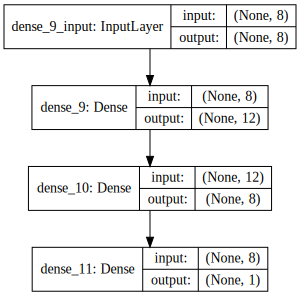

In [25]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

#### 모델 학습과정 설정하기

- loss : 현재 가중치 세트를 평가하는 데 사용한 손실 함수. 이진 클래스 문제이므로 ‘binary_crossentropy’으로 지정
- optimizer : 최적의 가중치를 검색하는 데 사용되는 최적화 알고리즘으로 효율적인 경사 하강법 알고리즘 중 하나인 ‘adam’ 사용
    - [Optimizer 설명](http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html)
- metrics : 평가 척도를 나타내며 분류 문제에서는 일반적으로 ‘accuracy’으로 지정

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 모델 학습시키기
- 모델을 학습시키기 위해서 fit() 함수를 사용
    - 첫번째 인자 : 입력 변수입니다. 8개의 속성 값을 담고 있는 X를 입력합니다.
    - 두번째 인자 : 출력 변수 즉 라벨값입니다. 결과 값을 담고 았는 Y를 입력합니다.
    - epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정합니다. 1500번을 반복적으로 학습시켜 보겠습니다.
    - batch_size : 가중치를 업데이트할 배치 크기를 의미하며, 64개로 지정했습니다.

In [27]:
model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
700/700 [==============================] - 0s - loss: 4.3755 - acc: 0.6543     
Epoch 2/100
700/700 [==============================] - 0s - loss: 3.6687 - acc: 0.6429     
Epoch 3/100
700/700 [==============================] - 0s - loss: 3.4673 - acc: 0.6100     
Epoch 4/100
700/700 [==============================] - 0s - loss: 3.1125 - acc: 0.6286     
Epoch 5/100
700/700 [==============================] - 0s - loss: 2.6533 - acc: 0.6657     
Epoch 6/100
700/700 [==============================] - 0s - loss: 

#### 모델 평가하기
- 시험셋으로 학습한 모델을 평가

In [17]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

32/68 [=============>................] - ETA: 0sacc: 76.47%


In [19]:
scores

[0.5687108846271739, 0.76470588235294112]

#### 데이터셋 요약

- pima-indians-diabetes.cost : 속성별로 테스트를 위한 비용이 캐나다 달러로 표시되어 있습니다.
- pima-indians-diabetes.delay : 속성별로 테스트 시에 바로 결과가 나오는 지(‘immediate’) 아니면 시간이 걸리는 지(‘delayed’)가 표시되어 있습니다. 예를 들어 혈액 검사는 혈액을 취득 후에 실험실로 보내졌다가 다음날 의사에게 전달되기 때문에 테스트에 시간이 걸립니다.
- pima-indians-diabetes.expense : 단체로 테스트를 할 경우에는 할인이 될 수 있기 때문에, 각 속성별로 단체 할인 비용을 표시하였습니다.
- pima-indians-diabetes.group : 단체로 그룹핑할 수 있는 속성이 표기되어 있습니다.


#### 컨볼루션 신경망 레이어 이야기

- 필터로 특징을 뽑아주는 컨볼루션(Convolution) 레이어
- 케라스에서 제공되는 컨볼루션 레이어 종류에도 여러가지가 있음. 영상 처리에 주로 사용되는 Conv2D 레이어를 살펴보겠음. 레이어는 영상 인식에 주로 사용되며, 필터가 탑재되어 있음

```
Conv2D(32, (5, 5), padding='valid', input_shape=(28, 28, 1), activation='relu')
```

- 첫번째 인자 : 컨볼루션 필터의 수
- 두번째 인자 : 컨볼루션 커널의 (행, 열)
    - padding : 경계 처리 방법을 정의
    - ‘valid’ : 유효한 영역만 출력이 됩니다. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작습니다.
    - ‘same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일합니다.

- input_shape : 샘플 수를 제외한 입력 형태를 정의, 모델에서 첫 레이어일 때만 정의하면 됩니다. (행, 열, 채널 수)로 정의. 흑백영상인 경우에는 채널이 1이고, 컬러(RGB)영상인 경우에는 채널을 3으로 설정합니다.

- activation : 활성화 함수 설정합니다.
    - ‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
    - ‘relu’ : rectifier 함수, 은익층에 주로 쓰입니다.
    - ‘sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
    - ‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.

#### 입력 형태
- image_data_format이 ‘channels_first’인 경우 (샘플 수, 채널 수, 행, 열)로 이루어진 4D 텐서입니다.
- image_data_format이 ‘channels_last’인 경우 (샘플 수, 행, 열, 채널 수)로 이루어진 4D 텐서입니다.
- image_data_format 옵션은 “keras.json” 파일 안에 있는 설정입니다. 콘솔에서 “vi ~/.keras/keras.json”으로 keras.json 파일 내용을 변경할 수 있음.


#### 출력 형태
- image_data_format이 ‘channels_first’인 경우 (샘플 수, 필터 수, 행, 열)로 이루어진 4D 텐서입니다.
- image_data_format이 ‘channels_last’인 경우 (샘플 수, 행, 열, 필터 수)로 이루어진 4D 텐서입니다.
- 행과 열의 크기는 padding가 ‘same’인 경우에는 입력 형태의 행과 열의 크기가 동일합니다.

```
Conv2D(1, (2, 2), padding='valid', input_shape=(3, 3, 1))
```

![img4_6](./img/img4_6.png)

- 필터는 가중치를 의미합니다. 하나의 필터가 입력 이미지를 순회하면서 적용된 결과값을 모으면 출력 이미지가 생성됩니다. 여기에는 두 가지 특성이 있습니다.
    - 하나의 필터로 입력 이미지를 순회하기 때문에 순회할 때 적용되는 가중치는 모두 동일합니다. 이를 파라미터 공유라고 부릅니다. 이는 학습해야할 가중치 수를 현저하게 줄여줍니다.
    - 출력에 영향을 미치는 영역이 지역적으로 제한되어 있습니다. 즉 그림에서 y~0~에 영향을 미치는 입력은 x~0~, x~1~, x~3~, x~4~으로 한정되어 있습니다. 이는 지역적인 특징을 잘 뽑아내게 되어 영상 인식에 적합합니다. 예를 들어 코를 볼 때는 코 주변만 보고, 눈을 볼 때는 눈 주변만 보면서 학습 및 인식하는 것입니다.
    
![img4_7](./img/img4_7.png)
![img4_8](./img/img4_8.png)

#### 경계 처리 방법
- 컨볼루션 레이어 설정 옵션에는 border_mode가 있는데, ‘valid’와 ‘same’으로 설정할 수 있습니다. 이 둘의 차이는 아래 그림에서 확인할 수 있음

![img4_9](./img/img4_9.png)

#### 필터 수
- 입력 이미지가 단채널의 3 x 3이고, 2 x 2인 필터가 하나 있다면 다음과 같이 컨볼루션 레이어를 정의할 수 있음

![img4_9](./img/img4_10.png)
![img4_9](./img/img4_11.png)


#### 사소한 변화를 무시해주는 맥스풀링(Max Pooling) 레이어

```
MaxPooling2D(pool_size=(2, 2))
```

- pool_size : 수직, 수평 축소 비율을 지정합니다. (2, 2)이면 출력 영상 크기는 입력 영상 크기의 반으로 줄어듭니다.

![img4_9](./img/img4_12.png)


#### 영상을 일차원으로 바꿔주는 플래튼(Flatten) 레이어
- CNN에서 컨볼루션 레이어나 맥스풀링 레이어를 반복적으로 거치면 주요 특징만 추출되고, 추출된 주요 특징은 전결합층에 전달되어 학습됩니다. 
- 컨볼루션 레이어나 맥스풀링 레이어는 주로 2차원 자료를 다루지만 전결합층에 전달하기 위해선 1차원 자료로 바꿔줘야 합니다. 이 때 사용되는 것이 플래튼 레이어

In [28]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [29]:
model = Sequential()

model.add(Conv2D(2, (3, 3), padding='same', activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(3, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

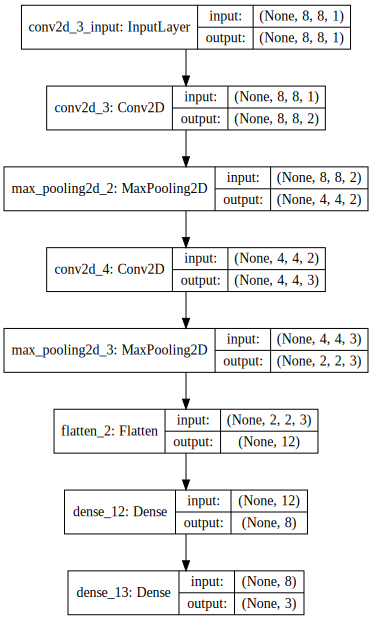

In [30]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 컨볼루션 신경망 모델 만들어보기

- 문제 정의하기
- 데이터 준비하기
- 데이터셋 생성하기
- 모델 구성하기
- 모델 학습과정 설정하기
- 모델 학습시키기
- 모델 평가하기

#### 문제 정의하기

- 문제 형태 : 다중 클래스 분류
- 입력 : 손으로 그린 삼각형, 사각형, 원 이미지

- 모양별로 20개 정도를 만들어서 15개를 훈련에 사용하고, 5개를 테스트에 사용해보겠습니다. 이미지는 png나 jpg로 저장. 
- 실제로 데이터셋이 어떻게 구성되어 있는 지 모른 체 튜토리얼을 따라하거나 예제 코드를 실행시키다보면 결과는 잘 나오지만 막상 실제 문제에 적용할 때 막막해질 때가 있습니다. 간단한 예제로 직접 데이터셋을 만들어봄으로써 실제 문제에 접근할 때 시행착오를 줄이는 것이 중요합니다.


#### 데이터셋 생성하기

- 케라스에서는 이미지 파일을 쉽게 학습시킬 수 있도록 ImageDataGenerator 클래스를 제공. 
- ImageDataGenerator 클래스는 데이터 증강 (data augmentation)을 위해 막강한 기능을 제공하는데, 이 기능들은 다른 강좌에세 다루기로 하고, 본 강좌에서는 특정 폴더에 이미지를 분류 해놓았을 때 이를 학습시키기 위한 데이터셋으로 만들어주는 기능을 사용해보겠습니다.

- 먼저 ImageDataGenerator 클래스를 이용하여 객체를 생성한 뒤 flow_from_directory() 함수를 호출하여 제네레이터(generator)를 생성합니다. - flow_from_directory() 함수의 주요인자는 다음과 같습니다.

    - 첫번재 인자 : 이미지 경로를 지정합니다.
    - target_size : 패치 이미지 크기를 지정합니다. 폴더에 있는 원본 이미지 크기가 다르더라도 target_size에 지정된 크기로 자동 조절됩니다.
    - batch_size : 배치 크기를 지정합니다.
    - class_mode : 분류 방식에 대해서 지정합니다.
    - categorical : 2D one-hot 부호화된 라벨이 반환됩니다.
    - binary : 1D 이진 라벨이 반환됩니다.
    - sparse : 1D 정수 라벨이 반환됩니다.
    - None : 라벨이 반환되지 않습니다.
    
- 본 예제에서는 패치 이미지 크기를 24 x 24로 하였으니 target_size도 (24, 24)로 셋팅하였습니다. 
- 훈련 데이터 수가 클래스당 15개이니 배치 크기를 3으로 지정하여 총 5번 배치를 수행하면 하나의 epoch가 수행될 수 있도록 하였습니다. 
- 다중 클래스 문제이므로 class_mode는 ‘categorical’로 지정하였습니다. 그리고 제네레이터는 훈련용과 검증용으로 두 개를 만들었습니다.

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
        './data/handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        './data/handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


#### 모델 구성하기
- 영상 분류에 높은 성능을 보이고 있는 컨볼루션 신경망 모델을 구성함

    - 컨볼루션 레이어 : 입력 이미지 크기 24 x 24, 입력 이미지 채널 3개, 필터 크기 3 x 3, 필터 수 32개, 활성화 함수 ‘relu’
    - 컨볼루션 레이어 : 필터 크기 3 x 3, 필터 수 64개, 활성화 함수 ‘relu’
    - 맥스풀링 레이어 : 풀 크기 2 x 2
    - 플래튼 레이어
    - 댄스 레이어 : 출력 뉴런 수 128개, 활성화 함수 ‘relu’
    - 댄스 레이어 : 출력 뉴런 수 3개, 활성화 함수 ‘softmax’

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

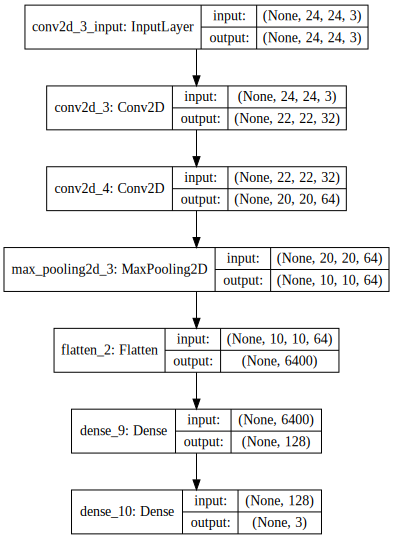

In [28]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 모델 학습시키기
- 케라스에서는 모델을 학습시킬 때 주로 fit() 함수를 사용하지만 제네레이터로 생성된 배치로 학습시킬 경우에는 fit_generator() 함수를 사용 
- 본 예제에서는 ImageDataGenerator라는 제네레이터로 이미지를 담고 있는 배치로 학습시키기 때문에 fit_generator() 함수를 사용함

    - 첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정합니다. 본 예제에서는 앞서 생성한 train_generator으로 지정합니다.
    - steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정합니다. 총 45개의 훈련 샘플이 있고 배치사이즈가 3이므로 15 스텝으로 지정합니다.
    - epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정합니다. 100번을 반복적으로 학습시켜 보겠습니다.
    - validation_data : 검증데이터셋을 제공할 제네레이터를 지정합니다. 본 예제에서는 앞서 생성한 validation_generator으로 지정합니다.
    - validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다. 홍 15개의 검증 샘플이 있고 배치사이즈가 3이므로 5 스텝으로 지정합니다.

In [30]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/50
15/15 [==============================] - 4s - loss: 1.3418 - acc: 0.5111 - val_loss: 0.6048 - val_acc: 0.9333
Epoch 2/50
15/15 [==============================] - 0s - loss: 0.2111 - acc: 1.0000 - val_loss: 0.1345 - val_acc: 1.0000

#### 모델 평가하기

In [32]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 100.00%


#### 모델 사용하기

In [33]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'rectangle': 1, 'circle': 0, 'triangle': 2}
[[1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.001 0.999]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.226 0.522 0.251]
 [0.000 0.000 1.000]]


In [44]:
output[13]

array([0.226, 0.522, 0.251], dtype=float32)

In [51]:
test_generator.filenames

['circle/circle016.png',
 'circle/circle017.png',
 'circle/circle018.png',
 'circle/circle019.png',
 'circle/circle020.png',
 'rectangle/rectangle016.png',
 'rectangle/rectangle017.png',
 'rectangle/rectangle018.png',
 'rectangle/rectangle019.png',
 'rectangle/rectangle020.png',
 'triangle/triangle016.png',
 'triangle/triangle017.png',
 'triangle/triangle018.png',
 'triangle/triangle019.png',
 'triangle/triangle020.png']

![circle014](./data/handwriting_shape/test/triangle/triangle019.png)


#### 요약
- 이미지 분류 문제에 높은 성능을 보이고 있는 컨볼루션 신경망 모델을 이용하여 직접 만든 데이터셋으로 학습 및 평가를 해보았습니다. 
- 학습 결과는 좋게 나왔지만 이 모델은 한 사람이 그린 것에 대해서만 학습이 되어 있어 다른 사람에 그린 모양은 분류를 잘 하지 못합니다. 이를 해결하기 위한 방안으로 ‘데이터 부풀리기’ 기법이 있습니다.
- 참고로 실제 문제에 적용하기 전에 데이터셋을 직접 만들어보거나 좀 더 쉬운 문제로 추상화해서 프로토타이핑 하시는 것을 권장드립니다. 객담도말된 결핵 이미지 판별하는 모델을 만들 때, 결핵 이미지를 바로 사용하지 않고, MNIST의 손글씨 중 ‘1’과 ‘7’을 결핵이라고 보고, 나머지는 결핵이 아닌 것으로 학습시켜봤었습니다.
- 결핵균이 간균 (막대모양)이라 적절한 프로토타이핑이었고, 프로토타이핑 모델과 실제 데이터셋으로 학습한 모델 결과가 크게 차이나지 않았습니다.

### 컨볼루션 신경망 모델을 위한 데이터 부풀리기

- 컨볼루션 신경망 모델의 성능을 높이기 위한 방법 중 하나인 데이터 부풀리기에 대해서 알아보겠음 
- 훈련셋이 부족하거나 훈련셋이 시험셋의 특성을 충분히 반영하지 못할 때 이 방법을 사용하면 모델의 성능을 크게 향상시킬 수 있음
- 케라스에서는 데이터 부풀리기를 위한 함수를 제공하기 때문에 파라미터 셋팅만으로 간단히 데이터 부풀리기를 할 수 있음 
    - 현실적인 문제
    - 기존 모델 결과보기
    - 데이터 부풀리기
    - 개선 모델 결과보기
    
#### 현실적인 문제

![4_13](./img/img4_13.png)
![4_14](./img/img4_14.png)

#### 기존 모델 결과보기

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        './data/handwriting_shape/test2',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 15 images belonging to 3 classes.


In [10]:
# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [68]:
# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/200
15/15 [==============================] - 4s - loss: 0.9905 - acc: 0.4667 - val_loss: 1.1690 - val_acc: 0.4000
Epoch 2/200
15/15 [==============================] - 0s - loss: 0.2105 - acc: 0.9778 - val_loss: 2.7341 - val_acc: 0.3333

In [69]:
# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 46.67%


In [70]:
# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)

-- Predict --
[[0.000 0.008 0.992]
 [0.000 0.000 1.000]
 [0.872 0.000 0.128]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.872 0.000 0.128]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.097 0.003 0.900]
 [0.000 0.002 0.998]
 [0.000 0.000 1.000]]


##### 데이터 부풀리기
- 케라스에서는 ImageDataGenerator 함수를 통해서 데이터 부풀리기 기능을 제공합니다. keras.io 페이지를 보면, 아래와 같은 옵션으로 데이터 부풀리기를 할 수 있습니다.

```
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=0.,
width_shift_range=0.,
height_shift_range=0.,
shear_range=0.,
zoom_range=0.,
channel_shift_range=0.,
fill_mode='nearest',
cval=0.,
horizontal_flip=False,
vertical_flip=False,
rescale=None,
preprocessing_function=None,
data_format=K.image_data_format())
```

![4_15](./img/img4_15.png)
![4_16](./img/img4_16.png)
![4_17](./img/img4_17.png)

In [7]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
                                   
img = load_img('./data/handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
for batch in train_datagen.flow(x, batch_size=1, save_to_dir='./data/handwriting_shape/preview', save_prefix='tri', save_format='png'):
    i += 1
    if i > 30: 
        break

In [8]:
x.shape

(1, 24, 24, 3)

#### 개선 모델 결과보기
- 데이터 부풀리기를 하기 위해서는 기존 코드에서 아래 코드를 추가합니다. 각 파라미터 설정 값에 따라 결과가 다르기 나오니, 실제 데이터에 있을만한 수준으로 적정값을 지정하셔야 합니다.
- 수정된 전체 코드는 다음과 같습니다. 참고로 시험셋은 데이터 부풀리기를 할 필요가 없으니, test_datagen 객체 생성 시에는 별도의 파라미터를 추가하지 않았습니다. 그리고 fit_generator함수에서 steps_per_epoch의 값은 기존 15개에서 더 많은 수 (현재 예는 1500개)로 설정합니다. 
- batch_size * steps_per_epoch가 전체 샘플 수 인데, 데이터 부풀리기를 하지 않을 때는 기존의 15개의 배치사이즈(3개)로 전체 45개를 모두 학습에 사용할 수 있지만, ImageDataGenerator함수를 통해 데이터 부풀리기는 할 때는 하나의 샘플로 여러 개의 결과를 얻기 때문에 요청하는 데로 무한의 샘플이 제공됩니다. 여기서는 100배 정도인 1500개로 설정했습니다.

In [9]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(3)

from keras.preprocessing.image import ImageDataGenerator

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        './data/handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        './data/handwriting_shape/test2',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 10,
        epochs=10,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/10
150/150 [==============================] - 4s - loss: 0.9513 - acc: 0.4978 - val_loss: 1.0050 - val_acc: 0.4667

In [12]:
# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 66.67%


In [13]:
# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)

-- Predict --
[[0.938 0.000 0.062]
 [0.020 0.004 0.977]
 [0.261 0.000 0.738]
 [0.012 0.000 0.988]
 [0.184 0.000 0.816]
 [0.002 0.000 0.997]
 [0.741 0.128 0.131]
 [0.938 0.000 0.062]
 [0.002 0.997 0.001]
 [0.002 0.000 0.998]
 [0.944 0.051 0.005]
 [0.290 0.002 0.707]
 [0.005 0.000 0.995]
 [0.186 0.799 0.014]
 [0.050 0.003 0.947]]


- 73.33%의 정확도를 얻었습니다. 만족할만한 수준은 아니지만, 도전 시험셋으로 기존 모델을 시험했을 때의 결과가 50%를 못 미치는 수준에 비하면 비약적인 개선이 일어났습니다. 이는 동일한 모델을 사용하면서 훈련 데이터만 부풀려서 학습을 시켰을 뿐인데 성능 향상이 일어났습니다.

#### 결론
- 원, 삼각형, 사각형을 분류하는 간단한 문제에서도 개발 모델이 현실에 적용하기 위해서는 어떠한 어려움이 있는 지 알게되었습니다. 그리고 이를 극복하는 방안으로 데이터 부풀리기 방법에 대해서 알아보고, 각 파라미터 별로 어떻게 데이터를 부풀리는 지 생성된 이미지를 통해 살펴보왔습니다. 
- 훈련셋이 충분하지 않거나 시험셋의 다양한 특성을 반영되어 있지 않다면 데이터 부풀리기 방법은 성능 개선에 큰 도움을 줄 수 있습니다.